# Synonym Finder

Import libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

Load Model

In [4]:
# pre-trained model
model_path = 'models/pretrained/word2vec/GoogleNews-vectors-negative300.bin.gz'  

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

Find Synonims for a given word

In [21]:
def find_synonyms(word, model, top_n=10):
    try:
        synonyms = model.most_similar(word, topn=top_n)
        return dict(synonyms)
    except KeyError:
        print(f"'{word}' not found in the model vocabulary.")
        return {}

word = "assist"
synonyms = find_synonyms(word, model)
print(f"Top 10 synonyms for '{word}':")
for synonym, score in synonyms.items():
    print(f"{synonym}: {score}")


Top 10 synonyms for 'assist':
assisting: 0.6884344220161438
assisted: 0.662090003490448
help: 0.5641278028488159
assit: 0.5502156615257263
assists: 0.5478159785270691
Assisting: 0.5305299758911133
helpers: 0.5109642148017883
Assist: 0.4913455545902252
assistance: 0.48609766364097595
expedite: 0.46598854660987854


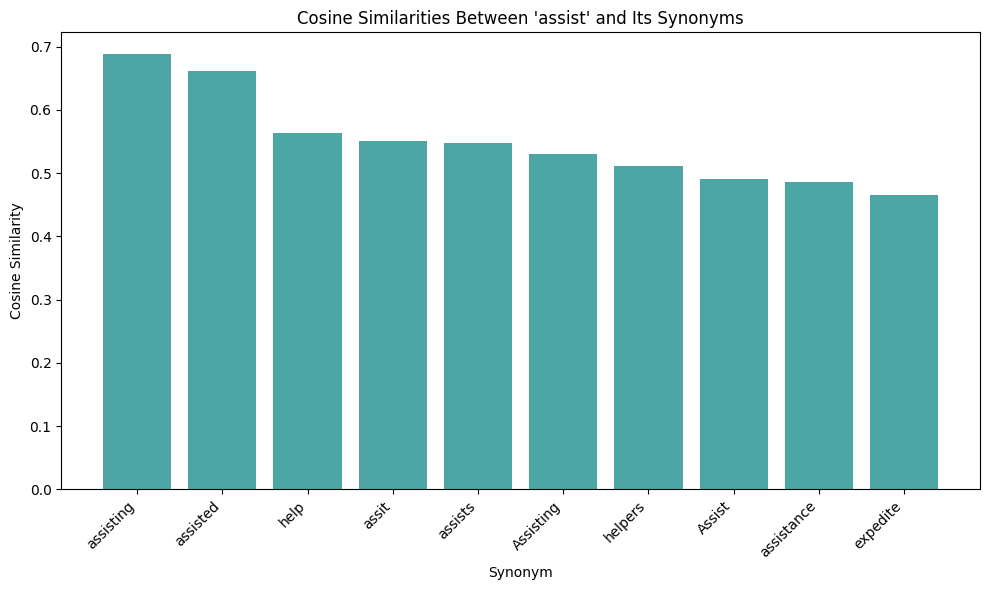

In [22]:
def plot_similarities(similarities, word):
    synonyms = list(similarities.keys())
    scores = list(similarities.values())

    plt.figure(figsize=(10, 6))
    plt.bar(synonyms, scores, color='teal', alpha=0.7)
    plt.xlabel("Synonym")
    plt.ylabel("Cosine Similarity")
    plt.title(f"Cosine Similarities Between '{word}' and Its Synonyms")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_similarities(synonyms, word)


Objectives : 
- Remove same words starting with capital letter or conjugations. Use string similarity instead of Embedding similarity. 

- FINDING THRESHOLD: we need train data !!!